In [1]:
#necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns



from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm

import warnings
warnings.simplefilter('ignore')

In [2]:
churn_dataset = pd.read_csv('churn.csv')
churn_dataset.shape

(7043, 21)

In [3]:
pd.set_option('display.max_columns', None)
churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_dataset.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
churn_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
churn_dataset.drop('customerID',axis=1,inplace=True)

## Analysis

In [7]:
churn_dataset.Churn.value_counts(1)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

<AxesSubplot:xlabel='Churn', ylabel='count'>

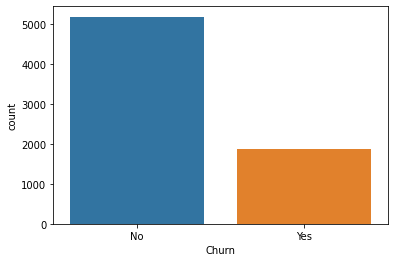

In [8]:
sns.countplot(churn_dataset.Churn)

## Statistical Analysis

In [9]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
churn_dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
churn_dataset.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### EDA Analysis

Text(0.5, 1.0, '% of Senior Citizens')

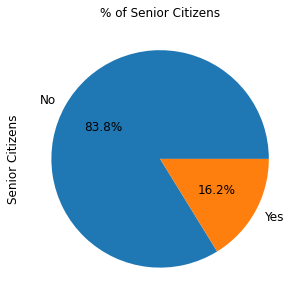

In [12]:
ax = (churn_dataset['SeniorCitizen'].value_counts()*100.0 /len(churn_dataset))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

##### There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

Text(0.5, 1.0, '# of Customers by their tenure')

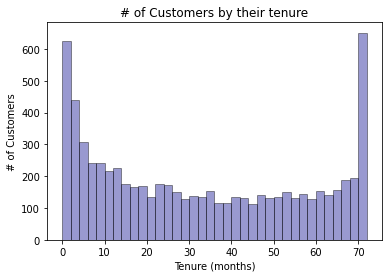

In [13]:
ax = sns.distplot(churn_dataset['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

##### Tenure(in Month): After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

Text(0.5, 1.0, '# of Customers by Contract Type')

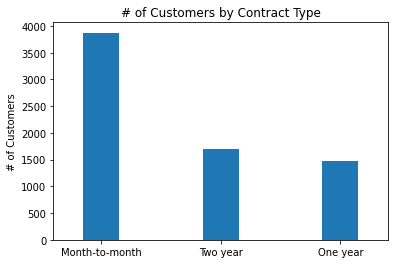

In [14]:
ax = churn_dataset['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Text(0.5, 1.0, 'Two Year Contract')

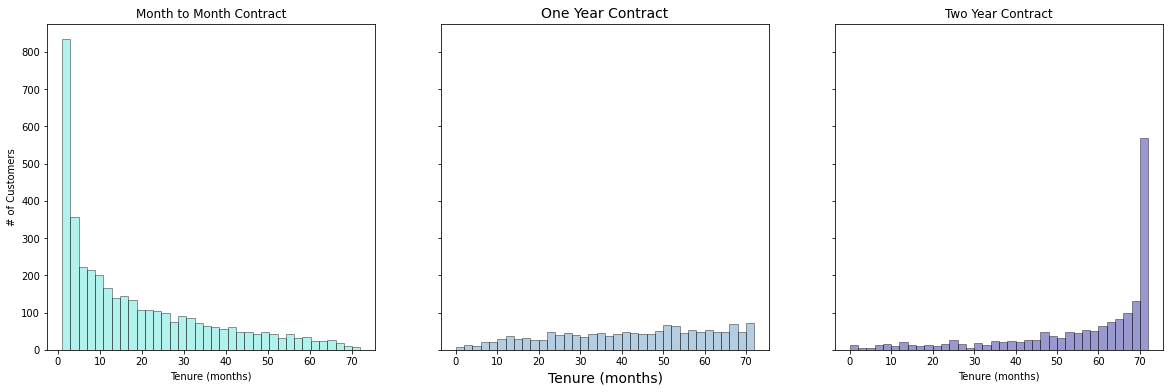

In [15]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(churn_dataset[churn_dataset['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(churn_dataset[churn_dataset['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(churn_dataset[churn_dataset['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

##### Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

This is also what we saw in the earlier chart on correlation with the churn rate.

In [16]:
churn_dataset.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

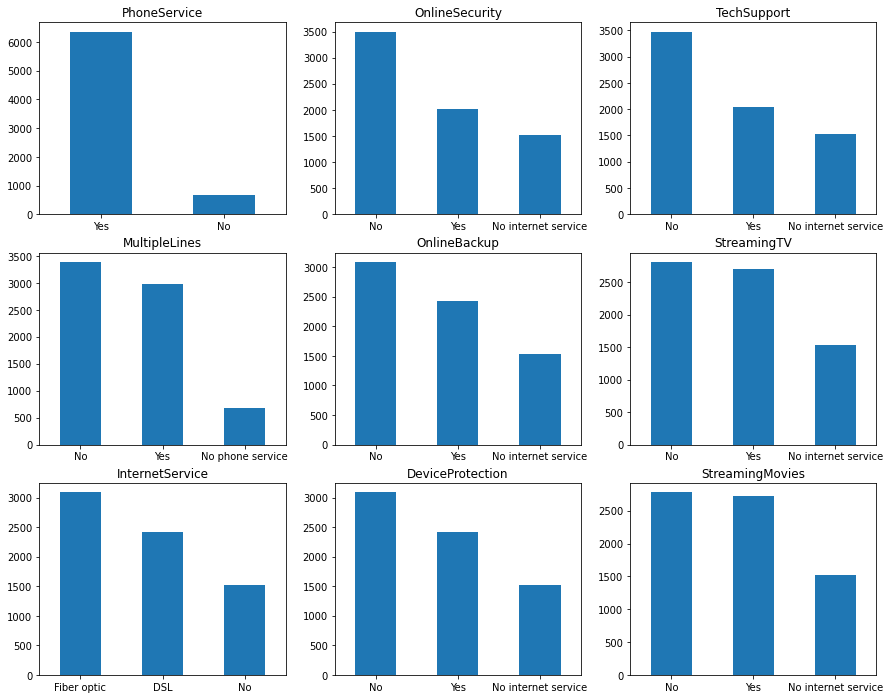

In [17]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = churn_dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = churn_dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = churn_dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

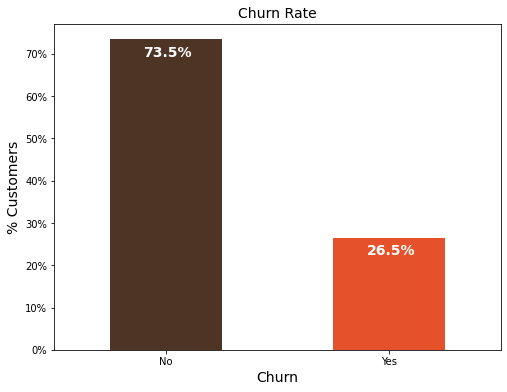

In [18]:
colors = ['#4D3425','#E4512B']
ax = (churn_dataset['Churn'].value_counts()*100.0 /len(churn_dataset)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

### Data Preprocess

In [19]:
churn_dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
cat_features = churn_dataset.select_dtypes(include=[np.object])
for i in cat_features:
    print(i," : ",churn_dataset[i].unique(),len(churn_dataset[i].unique()))

gender  :  ['Female' 'Male'] 2
Partner  :  ['Yes' 'No'] 2
Dependents  :  ['No' 'Yes'] 2
PhoneService  :  ['No' 'Yes'] 2
MultipleLines  :  ['No phone service' 'No' 'Yes'] 3
InternetService  :  ['DSL' 'Fiber optic' 'No'] 3
OnlineSecurity  :  ['No' 'Yes' 'No internet service'] 3
OnlineBackup  :  ['Yes' 'No' 'No internet service'] 3
DeviceProtection  :  ['No' 'Yes' 'No internet service'] 3
TechSupport  :  ['No' 'Yes' 'No internet service'] 3
StreamingTV  :  ['No' 'Yes' 'No internet service'] 3
StreamingMovies  :  ['No' 'Yes' 'No internet service'] 3
Contract  :  ['Month-to-month' 'One year' 'Two year'] 3
PaperlessBilling  :  ['Yes' 'No'] 2
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 4
TotalCharges  :  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] 6531
Churn  :  ['No' 'Yes'] 2


In [21]:
churn_dataset.TotalCharges = pd.to_numeric( churn_dataset.TotalCharges, errors='coerce')

In [22]:
churn_dataset['MultipleLines'] = churn_dataset['MultipleLines'].replace(('No phone service'),('No'))
churn_dataset['OnlineSecurity'] = churn_dataset['OnlineSecurity'].replace(('No internet service'),('No'))
churn_dataset['OnlineBackup'] = churn_dataset['OnlineBackup'].replace(('No internet service'),('No'))
churn_dataset['DeviceProtection'] = churn_dataset['DeviceProtection'].replace(('No internet service'),('No'))
churn_dataset['TechSupport'] = churn_dataset['TechSupport'].replace(('No internet service'),('No'))
churn_dataset['StreamingTV'] = churn_dataset['StreamingTV'].replace(('No internet service'),('No'))
churn_dataset['StreamingMovies'] = churn_dataset['StreamingMovies'].replace(('No internet service'),('No'))

In [23]:
cat_features = churn_dataset.select_dtypes(include=[np.object])
for i in cat_features:
    print(i," : ",churn_dataset[i].unique(),len(churn_dataset[i].unique()))

gender  :  ['Female' 'Male'] 2
Partner  :  ['Yes' 'No'] 2
Dependents  :  ['No' 'Yes'] 2
PhoneService  :  ['No' 'Yes'] 2
MultipleLines  :  ['No' 'Yes'] 2
InternetService  :  ['DSL' 'Fiber optic' 'No'] 3
OnlineSecurity  :  ['No' 'Yes'] 2
OnlineBackup  :  ['Yes' 'No'] 2
DeviceProtection  :  ['No' 'Yes'] 2
TechSupport  :  ['No' 'Yes'] 2
StreamingTV  :  ['No' 'Yes'] 2
StreamingMovies  :  ['No' 'Yes'] 2
Contract  :  ['Month-to-month' 'One year' 'Two year'] 3
PaperlessBilling  :  ['Yes' 'No'] 2
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 4
Churn  :  ['No' 'Yes'] 2


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_mod = churn_dataset.select_dtypes(include='object').columns
for i in cat_mod:
    churn_dataset[i] = le.fit_transform(churn_dataset[i])

In [25]:
churn_dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<AxesSubplot:>

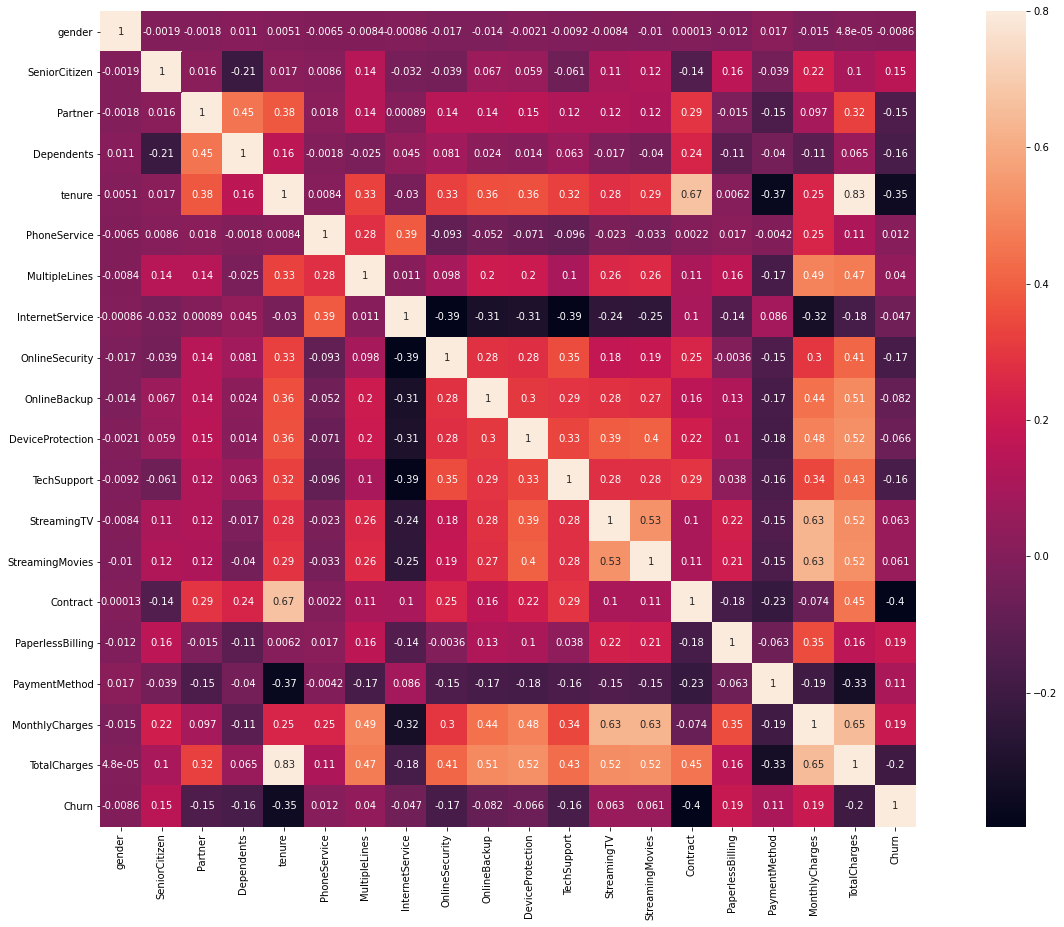

In [26]:
plt.figure(figsize=(25,15))
sns.heatmap(churn_dataset.corr(), vmax=.8, square=True,annot=True)

<AxesSubplot:>

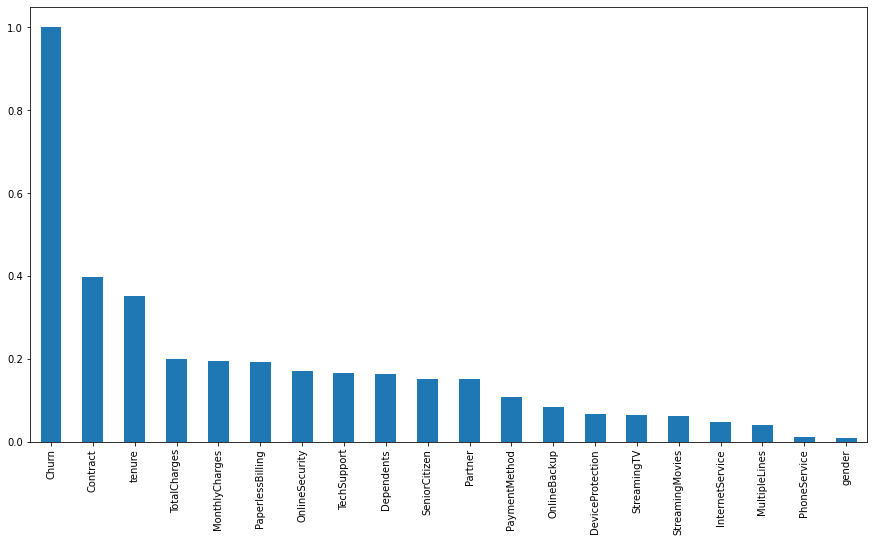

In [27]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
abs(churn_dataset.corr())['Churn'].sort_values(ascending = False).plot(kind='bar')

In [28]:
corr_matrix = abs(churn_dataset.corr())
print(corr_matrix["Churn"].sort_values(ascending=False))

Churn               1.000000
Contract            0.396713
tenure              0.352229
TotalCharges        0.199484
MonthlyCharges      0.193356
PaperlessBilling    0.191825
OnlineSecurity      0.171226
TechSupport         0.164674
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
OnlineBackup        0.082255
DeviceProtection    0.066160
StreamingTV         0.063228
StreamingMovies     0.061382
InternetService     0.047291
MultipleLines       0.040102
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64


In [29]:
churn_dataset['TotalCharges'] = churn_dataset['TotalCharges'].fillna(churn_dataset['TotalCharges'].median())

In [30]:
# churn_dataset[churn_dataset["TotalCharges"].isnull()]

In [31]:
# churn_dataset.iloc[488]

In [32]:
X = churn_dataset.drop(['Churn','Contract','MonthlyCharges'],axis = 1)
y = churn_dataset['Churn']

In [33]:
X.shape,y.shape

((7043, 17), (7043,))

### Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.

In [34]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_sample(X,y)

In [35]:
## SMOTEENN
X_resampled1.shape, y_resampled1.shape

((5996, 17), (5996,))

In [36]:
y_resampled1.value_counts()

1    3377
0    2619
Name: Churn, dtype: int64

In [37]:
#split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled1, y_resampled1,test_size = 0.30, random_state = 50)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4197, 17), (1799, 17), (4197,), (1799,))

## Model Build

In [40]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,classification_report,roc_auc_score,accuracy_score

In [41]:
def evaluation(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred =model.predict(X_test)
    
    print("Train_Score: ",model.score(X_train, y_train))
    print("Test_Score: ",model.score(X_test,y_test))

    
    return y_pred
    

In [42]:
#model
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
y_pred= evaluation(clf_lr,X_train,y_train,X_test,y_test)

print(classification_report(y_test,y_pred))

Train_Score:  0.9108887300452704
Test_Score:  0.906058921623124
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       783
           1       0.91      0.93      0.92      1016

    accuracy                           0.91      1799
   macro avg       0.91      0.90      0.90      1799
weighted avg       0.91      0.91      0.91      1799



In [43]:
#model
from sklearn.ensemble import RandomForestClassifier
clf_rfr = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
y_pred= evaluation(clf_rfr,X_train,y_train,X_test,y_test)

print(classification_report(y_test,y_pred))

Train_Score:  0.9340004765308554
Test_Score:  0.9321845469705392
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       783
           1       0.93      0.95      0.94      1016

    accuracy                           0.93      1799
   macro avg       0.93      0.93      0.93      1799
weighted avg       0.93      0.93      0.93      1799



In [44]:
#model
from lightgbm import LGBMClassifier
clf_lgb = LGBMClassifier()
y_pred= evaluation(clf_lgb,X_train,y_train,X_test,y_test)

print(classification_report(y_test,y_pred))

Train_Score:  0.9899928520371694
Test_Score:  0.952751528627015
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       783
           1       0.95      0.97      0.96      1016

    accuracy                           0.95      1799
   macro avg       0.95      0.95      0.95      1799
weighted avg       0.95      0.95      0.95      1799



In [52]:
## parameter Tuning

from sklearn.model_selection import RandomizedSearchCV
params={
    "n_estimators":[300,400,500,600,700,800,900],
"max_depth" : [660,70,80,90,100],
"learning_rate" : [0.0001,0.001,0.005,0.0005],
"num_leaves":[40,50,60,70,80]}

classifier= LGBMClassifier()

random_search = RandomizedSearchCV (classifier,param_distributions=params,n_iter
=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_resampled1, y_resampled1)

print('Best roc_auc: {:.4}, with best C: {}'.format(random_search.best_score_,
random_search.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best roc_auc: 0.9799, with best C: {'num_leaves': 80, 'n_estimators': 900, 'max_depth': 90, 'learning_rate': 0.001}


In [46]:
## cross validation
params = random_search.best_params_
def classifier(X_train, y_train):
    
    clf =  LGBMClassifier(**params,random_state=45).fit(X_train,y_train)
    
    return clf


In [47]:

# transformation from prediction probabolity to class given the threshold
def adjusted_classes(y_scores, t):
    # transformation from prediction probabolity to class given the threshold
    return [1 if y >= t else 0 for y in y_scores]

## cross validation
def cv(X, y, shuffle=True):
    threshold = 0.1
    prediction_folds = []
    y_preds_folds = []
    y_folds = []
    
    
    skf = StratifiedKFold(n_splits=5, random_state=2, shuffle=shuffle)
    for train_index, test_index in tqdm(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        clf = classifier(X_train, y_train)
        y_preds = clf.predict(X_test)
        
        predictions = []
        predictions = adjusted_classes(y_preds, threshold)
        
        prediction_folds.extend(predictions)
        y_preds_folds.extend(y_preds)
        y_folds.extend(y_test)
        
            
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test,y_test)
              
        
        final_clf = classifier(X_train, y_train)
    
    return (final_clf,prediction_folds,y_preds_folds,y_folds,train_score,test_score)

In [48]:
my_model,prediction_folds,y_preds_folds,y_folds,train_score,test_score = cv(X_resampled1, y_resampled1)

5it [00:17,  3.40s/it]


In [49]:
print(classification_report(y_folds,y_preds_folds))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2619
           1       0.95      0.96      0.95      3377

    accuracy                           0.95      5996
   macro avg       0.95      0.95      0.95      5996
weighted avg       0.95      0.95      0.95      5996



In [50]:
train_score,test_score

(0.9935376276839691, 0.9382819015846539)

In [51]:
my_model

LGBMClassifier(learning_rate=0.01, max_depth=80, n_estimators=600,
               num_leaves=70, random_state=45)

In [53]:
#dumb file
import pickle
filename = 'churn_lgbm.pkl'
pickle.dump(my_model, open(filename, 'wb'))

In [54]:
model = open(filename,"rb")
model = pickle.load(model)

In [55]:
model

LGBMClassifier(learning_rate=0.01, max_depth=80, n_estimators=600,
               num_leaves=70, random_state=45)